# **Scrabbing Data About Barbers in **NYC**** 

---



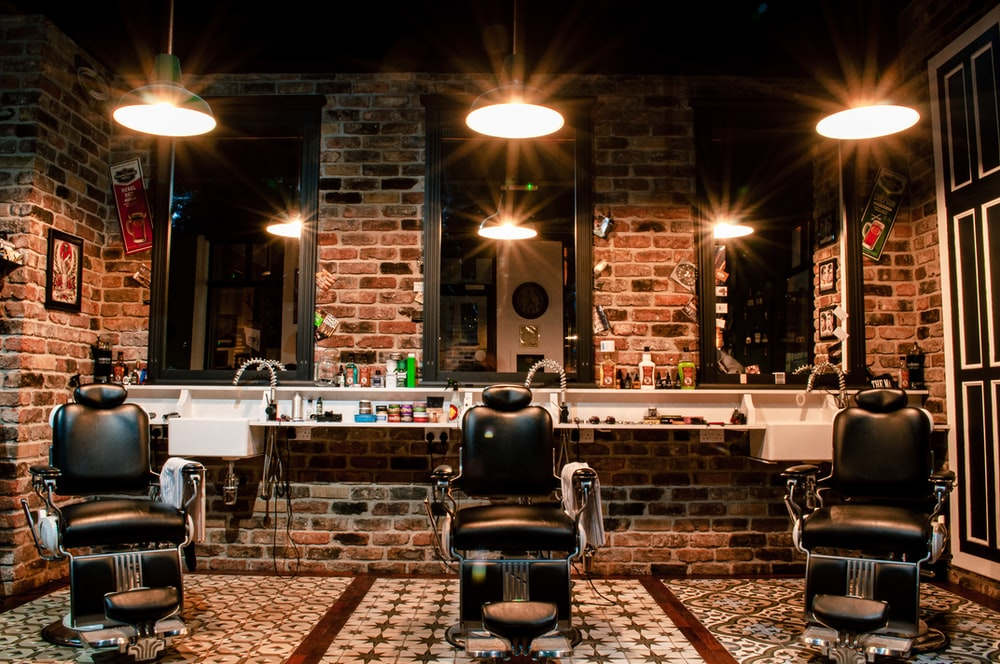

In [1]:
import csv 
from bs4 import BeautifulSoup
from itertools import zip_longest
import requests
import pandas as pd
import re
import numpy as np

In [2]:
data  = requests.get("https://www.timeout.com/newyork/health-beauty/the-best-salons-for-men-in-new-york")
soup=BeautifulSoup(data.text,"html.parser")

In [3]:
total=soup.find_all("article",{"class":"tile _article_1p2xe_1"})

In [4]:
names=[]
describes=[]
links=[]
locations=[]
contacts=[]

data=[]

for i in total:
  name=i.find("div",{"class":"_title_1p2xe_9"}).text
  describe=i.find("div",{"class":"_tileTags_1p2xe_44"}).text
  link=i.find("div",{"class":"_title_1p2xe_9"}).find("a").get("href")
  names.append(name)
  describes.append(describe)
  links.append(link)
  data.append([name,describe,link])

In [5]:
len(names)

11

In [6]:
len(links)

11

In [7]:
len(describes)

11

In [8]:
for link in links:

  source=requests.get(link)
  soup_=BeautifulSoup(source.text,"html.parser")
  data_=soup_.find_all("div",{"class":"_details_1fhdc_1"})

  location1= data_[0].text
  location2= data_[1].text
  final_location = location1 + location2
  contact= data_[2].text

  locations.append(final_location)
  contacts.append(contact)



In [9]:
len(contacts)

11

In [10]:
df1 = pd.DataFrame(np.random.randn(11, 5), columns=["Name","Describe","Link","Location","Contact"], index=pd.date_range('1/1/2011', periods=11, freq='D'))

barber_data_full = pd.DataFrame(
    {'Name': names,
     'Describe': describes,
     'Link': links,
     'Location':locations,
     'Contact':contacts
    })  


In [11]:
barber_data_full

,Name,Describe,Link,Location,Contact
0,John Allan's,Health and beautySpasMidtown East,https://www.timeout.com/newyork/shopping/john-...,"Address:Saks Fifth Avenue, 611 Fifth AveNew Yo...",Contact:johnallans.com212-940-2210
1,"Fleischman, A Men’s Salon",Health and beautyHair salonsMidtown East,https://www.timeout.com/newyork/salons/fleisch...,Address:142 E 49th StNew YorkCross street:betw...,Contact:fleischmansalon.com
2,Spiff,Health and beautyHair salonsMidtown East,https://www.timeout.com/newyork/health-and-bea...,Address:750 Third AveNew YorkCross street:betw...,Contact:spiffnyc.com212-204-8720
3,Adrian Fanus Grooming,Health and beautySpas,https://www.timeout.com/newyork/things-to-do/a...,Address:497 Deklab Ave 3rd floor Contact:347-5...,Price:$$
4,Martial Vivot Salon Pour Hommes,Health and beautyHair salonsMidtown Westprice ...,https://www.timeout.com/newyork/shopping/marti...,Address:39 W 54th StNew YorkCross street:betwe...,Contact:martialvivot.com212-956-2990
5,Takamichi Hair,Health and beautyHair salonsLower East Side,https://www.timeout.com/newyork/shopping/takam...,Address:263 Bowerysecond floor New YorkCross s...,Contact:takamichihair.com212-420-7979
6,Freemans Sporting Club,ShoppingMenswearLower East Side,https://www.timeout.com/newyork/shopping/freem...,Address:8 Rivington StNew YorkCross street:bet...,Contact:freemanssportingclub.com212-673-3209
7,Persons of Interest,Health and beautyBarbershopsWilliamsburg,https://www.timeout.com/newyork/shopping/perso...,Address:84 Havemeyer StNew YorkCross street:at...,Contact:personsofinterestbklyn.com718-218-9100
8,Prestige Barber Shop NYC,Health and beautyBarbershopsMidtown East,https://www.timeout.com/newyork/health-and-bea...,Address:237 E 53rd StNew York10022Cross street...,Contact:www.prestigebarbers-nyc.com(212) 752-4758
9,Truman's Gentlemen's Groomers,Health and beautySpasMidtown East,https://www.timeout.com/newyork/shopping/truma...,Address:120 E 56th StNew York Cross street:bet...,Contact:trumans-nyc.com212-759-5015


In [12]:
barber_data_full.to_csv('supercut.csv')

In [13]:
with open("Shops.csv","w") as fid:
  wr=csv.writer(fid)
  wr.writerow(["title","author","price","imag"])
  wr.writerows(barber_data_full)